<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# For this excercise I will be analysing inidivudal player performance from all Major League Baseball seasons from 1876 to the present day
# Dataset downloaded from https://www.kaggle.com/datasets/logancuster/baseball-seasons-data

In [38]:
mlb_season_data = pd.read_csv('mlb_season_data.csv', low_memory=False)
# because there was an error in the data (blank cells filled in as -- rather than empty) it was recommended that I added low_memory=False 

In [39]:
print(mlb_season_data)

        season first_name   last_name            link position team  \
0         1876        Bob        Addy  /player/110074        X  CHI   
1         1876        Art     Allison  /player/110170        X  LOU   
2         1876       Doug     Allison  /player/110172        C  HAR   
3         1876       Fred      Andrus  /player/110275        X  CHI   
4         1876        Cap       Anson  /player/110284       3B  CHI   
...        ...        ...         ...             ...      ...  ...   
104062    2024       Josh  Winckowski  /player/670174        P  BOS   
104063    2024       Eric        Yang  /player/687066        X  CIN   
104064    2024      Kirby       Yates  /player/489446        P  TEX   
104065    2024       Alex       Young  /player/622065        P  CIN   
104066    2024     Guillo      Zuñiga  /player/670871        P  LAA   

        games_played  at_bats  runs  hits  ...  homeruns  rbi  walks  \
0                 32      142    36    40  ...         0   16      5   
1  

In [40]:
# Using 'sort values' to find the players with the most home runs in any individual season
mlb_season_data[['first_name','last_name','season','games_played','homeruns']].sort_values(by=['homeruns'], ascending=False)[0:10]

,first_name,last_name,season,games_played,homeruns
77265,Barry,Bonds,2001,153,73
73927,Mark,McGwire,1998,155,70
73938,Sammy,Sosa,1998,159,66
75028,Mark,McGwire,1999,153,65
77273,Sammy,Sosa,2001,160,64
75042,Sammy,Sosa,1999,162,63
101767,Aaron,Judge,2022,157,62
45224,Roger,Maris,1961,161,61
21361,Babe,Ruth,1927,151,60
96014,Giancarlo,Stanton,2017,159,59


In [41]:
# Using 'sort values' to find the players with the highest batting average in any individual season
# This time, because small sample sizes can skew averages, I have limited this to players who played a significant amount during the season
mlb_season_data[(mlb_season_data['at_bats'] >= 300)][['first_name','last_name','season','games_played','batting_average']].sort_values(by=['batting_average'], ascending=False)[0:10]

,first_name,last_name,season,games_played,batting_average
4788,Hugh,Duffy,1894,125,0.440
2424,Tip,O'Neill,1887,124,0.435
5,Ross,Barnes,1876,66,0.429
20520,Mule,Suttles,1926,89,0.425
18807,Rogers,Hornsby,1924,143,0.424
5607,Willie,Keeler,1897,129,0.424
21374,Roy,Parnell,1927,87,0.422
6667,Nap,Lajoie,1901,131,0.421
10836,Ty,Cobb,1911,146,0.420
17361,George,Sisler,1922,142,0.420


In [42]:
# While this is interesting, it's heavily skewed to older baseball, so I added in an extra qualifier to highlight recent seasons
mlb_season_data[(mlb_season_data['at_bats'] >= 300)&(mlb_season_data['season'] >= 1940)][['first_name','last_name','season','games_played','batting_average']].sort_values(by=['batting_average'], ascending=False)[0:10]

,first_name,last_name,season,games_played,batting_average
31728,Ted,Williams,1941,143,0.406
70298,Tony,Gwynn,1994,110,0.394
59281,George,Brett,1980,117,0.390
42913,Ted,Williams,1957,132,0.388
57077,Rod,Carew,1977,155,0.388
75025,Larry,Walker,1999,127,0.379
37712,Stan,Musial,1948,155,0.376
76153,Todd,Helton,2000,160,0.372
80717,Ichiro,Suzuki,2004,161,0.372
76168,Nomar,Garciaparra,2000,140,0.372


In [43]:
# Now I want to find which players played the most seasons
# I started by collecting the data and then using describe to find the averages
player_season_count = mlb_season_data.groupby('link')['season'].nunique()
player_season_count.describe()

count    22022.000000
mean         4.725593
std          4.418601
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         26.000000
Name: season, dtype: float64

In [44]:
# Then I built this using ChatGPT and am not sure I fully understand it.
player_season_count = player_season_count.sort_values(ascending=False).head(10)
player_seasons_calc = mlb_season_data[mlb_season_data['link'].isin(player_season_count.index)][['first_name', 'last_name', 'link']] .drop_duplicates(subset='link')
most_player_seasons = player_seasons_calc.merge(player_season_count, on='link', how='left').rename(columns={'season': 'player_season_count'})
most_player_seasons = most_player_seasons.drop(columns=['link'])
most_player_seasons = most_player_seasons.sort_values(by='player_season_count', ascending=False)
print(most_player_seasons)

  first_name  last_name  player_season_count
0     Deacon    McGuire                   26
1      Bobby    Wallace                   25
3      Eddie    Collins                   25
8     Rickey  Henderson                   25
2         Ty       Cobb                   24
4        Jim       Kaat                   24
5       Pete       Rose                   24
6       Rick    Dempsey                   24
7    Carlton       Fisk                   24
9       Omar    Vizquel                   24


In [45]:
# Now I'm going to try to break down and modify ChatGPT's code to calculate a list of the playera with the most career home runs

# Group the stats by player then add everything in the homeruns column, then identify the top 10
career_homeruns_count = mlb_season_data.groupby('link')['homeruns'].sum()
career_homeruns_count = career_homeruns_count.sort_values(ascending=False).head(10)

# Bring the new calculations together with the original dataset so that it can be shown in one table
career_homeruns_calc = mlb_season_data[mlb_season_data['link'].isin(career_homeruns_count.index)][['first_name', 'last_name', 'link']] .drop_duplicates(subset='link')
most_career_homeruns = career_homeruns_calc.merge(career_homeruns_count, on='link', how='left').rename(columns={'homeruns': 'career_homeruns_calc'})

# Get rid of the link column, because it's messy and serves no purpose
most_career_homeruns = most_career_homeruns.drop(columns=['link'])

#Sort the final list
most_career_homeruns = most_career_homeruns.sort_values(by='career_homeruns_calc', ascending=False)
print(most_career_homeruns)

# Yey!

  first_name  last_name  career_homeruns_calc
4      Barry      Bonds                   762
2       Hank      Aaron                   755
0       Babe       Ruth                   714
9     Albert     Pujols                   703
8       Alex  Rodriguez                   696
1     Willie       Mays                   660
5        Ken    Griffey                   630
7        Jim      Thome                   612
6      Sammy       Sosa                   609
3      Frank   Robinson                   586


In [46]:
# Calculate how many homeruns were scored, in total, in each season

total_homeruns_per_season = mlb_season_data.groupby("season")["homeruns"].sum()
print(total_homeruns_per_season)

season
1876      40
1877      24
1878      23
1879      58
1880      62
        ... 
2020    2304
2021    5944
2022    5215
2023    5868
2024    5453
Name: homeruns, Length: 149, dtype: int64


<Axes: xlabel='season'>

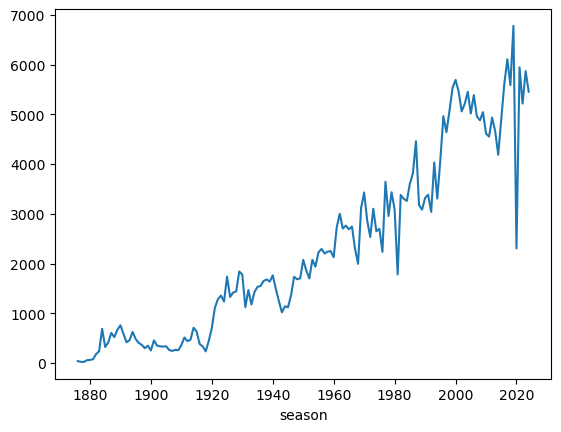

In [47]:
# Now show those numbers on a graph
total_homeruns_per_season.plot(x="season",y="homeruns")

<Axes: xlabel='season', ylabel='homeruns'>

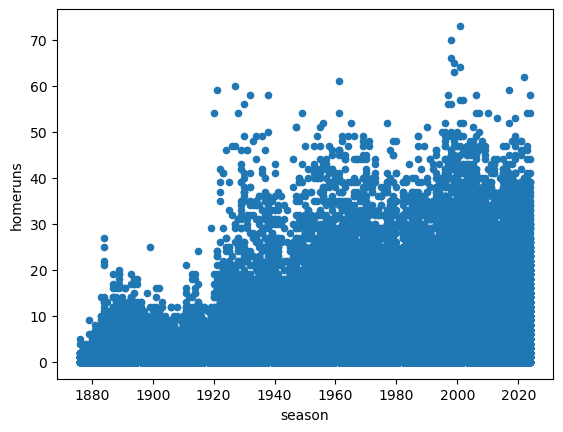

In [48]:
# I put the single-player homerun totals in a scatter graph. The bottom half isn't very useful but it's interesting to see the outliers.
mlb_season_data.plot.scatter(x="season",y="homeruns")

<Axes: xlabel='season'>

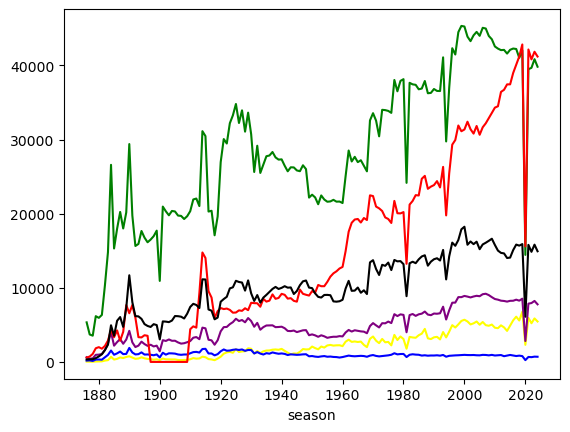

In [49]:
# Another graph with additional stats
total_singles_per_season = mlb_season_data.groupby("season")["hits"].sum()
total_doubles_per_season = mlb_season_data.groupby("season")["doubles"].sum()
total_triples_per_season = mlb_season_data.groupby("season")["triples"].sum()
total_strikeouts_per_season = mlb_season_data.groupby("season")["strikeouts"].sum()
total_walks_per_season = mlb_season_data.groupby("season")["walks"].sum()

total_homeruns_per_season.plot(x="season",y="homeruns",color='yellow')
total_singles_per_season.plot(x="season",y="singles",color='green')
total_doubles_per_season.plot(x="season",y="doubles",color='purple')
total_triples_per_season.plot(x="season",y="triples",color='blue')
total_strikeouts_per_season.plot(x="season",y="strikeouts",color='red')
total_walks_per_season.plot(x="season",y="walks",color='black')

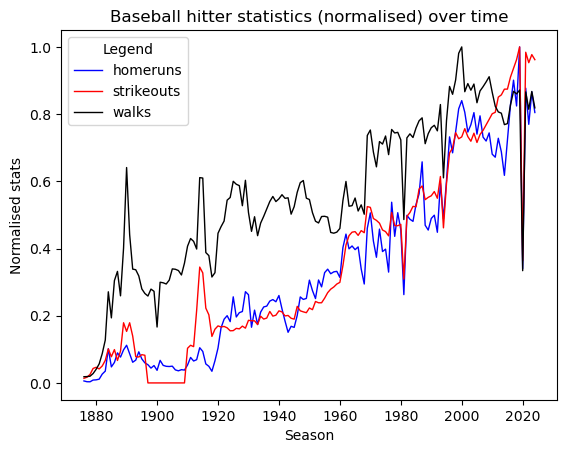

In [50]:
# It's an ok graph but because the numbers are on different scale (some in the hundreds, some in the tens of thousands) it's hard to compare. 
# I'll try to even them out.

most_total_homeruns_per_season = total_homeruns_per_season.max()
normalized_homeruns_per_season = total_homeruns_per_season / most_total_homeruns_per_season

most_total_strikeouts_per_season = total_strikeouts_per_season.max()
normalized_strikeouts_per_season = total_strikeouts_per_season / most_total_strikeouts_per_season

most_total_walks_per_season = total_walks_per_season.max()
normalized_walks_per_season = total_walks_per_season / most_total_walks_per_season

normalized_homeruns_per_season.plot(color='blue',linewidth=1)
normalized_strikeouts_per_season.plot(color='red',linewidth=1)
normalized_walks_per_season.plot(color='black',linewidth=1)

# Extra detail to improve the appearance and clarity of the graph
plt.title("Baseball hitter statistics (normalised) over time")
plt.xlabel("Season") and plt.ylabel("Normalised stats")
plt.legend(title='Legend', loc='upper left') 


In [ ]:
# to be continued